In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data inlezen
data=pd.read_csv('DataSet_CampusKortrijk_Sep1_Oct1.csv')
units=data.iloc[0,:]
units=units.drop(['_start','_stop','_time'])
data=data.iloc[1:,:]
data=data.set_index('_time',drop=True)
data.index=pd.to_datetime(data.index)
data=data.drop(['_start','_stop'],axis=1)

In [2]:
# Data pre-processing
data=data.fillna(0)
data=data.astype(float)

In [3]:
def naarkW(data,units):
    datakW=pd.DataFrame()
    for i in range(data.iloc[1,:].size):
        if units[i]=='kW':
            datakW=pd.concat([datakW,data.iloc[:,i]],axis=1)
        else:
            datakW=pd.concat([datakW,data.iloc[:,i]/1000],axis=1)
    return datakW

datakW=naarkW(data,units)

datakW.index=pd.to_datetime(datakW.index)

In [4]:
def maandver(data,gebouw):
    ener=data[gebouw].sum()*.25
    return ener

def duurcurve(data,feature):
    sort=np.sort(data[feature])[::-1]
    exceedence = np.arange(1.,len(sort)+1) / len(sort)
    
    plt.plot(exceedence*100, sort)
    plt.fill_between(exceedence*100, sort)
    plt.xlabel("Gebeurtenis [%]")
    plt.ylabel("Vermogen kW")
    plt.axis([0,100,sort.min(),sort.max()])
    plt.show()
    return

def kans(data,gebouw):
    data[gebouw].plot.density()
    plt.xlabel('Vermogen kW')
    return

def fourierMaan(data,gebouw):
    data[gebouw]=data[gebouw]/data[gebouw].max()
    t = np.arange(2880)
    sp = np.fft.fft(data[gebouw])
    sp=sp[range(int(len(data[gebouw])/2))]
    # freq = np.arange(int(np.size(dataG.Total)/2))/(np.size(dataG.Total)/35041)#np.fft.fftfreq(365,1/35040)
    freq=np.fft.fftfreq(t.size,1/2880)[:t.size//2]
    plt.plot(freq, abs(sp))
    plt.xlabel('frequentie [1/j]')
    plt.ylabel('spectrale densiteit [a.u.]')
    plt.axis([-5,300,0,max(abs(sp))*1.1])
    return

In [5]:
# OBEE

datakW['OBEE_Afname']=datakW[['G_OB_VermogenL1_kW','G_OB_VermogenL2_kW','G_OB_VermogenL3_kW']].sum(axis=1)


Maandelijksverbruik van G_A_100-200_Vermogen_W is 20214.3 kWh voor september
Maandelijksverbruik van IoT_lokaal_Vermogen_W is 12.1 kWh voor september
Maandelijksverbruik van PV_IoT_Vermogen_W is 164.1 kWh voor september
Maandelijksverbruik van G_o_total_Vermogen_kW is 71424.9 kWh voor september
Maandelijksverbruik van G_OB_VermogenL1_kW is 1609.3 kWh voor september
Maandelijksverbruik van G_OB_VermogenL2_kW is 1608.3 kWh voor september
Maandelijksverbruik van G_OB_VermogenL3_kW is 1016.6 kWh voor september
Maandelijksverbruik van Lemcko_Afname_kW is 1188.2 kWh voor september
Maandelijksverbruik van Lemcko_Pvproductie_kW is 1188.2 kWh voor september
Maandelijksverbruik van De_Reactor_Afname_W is 575.9 kWh voor september
Maandelijksverbruik van De_Reactor_Productie_W is 313.4 kWh voor september
Maandelijksverbruik van Penta_Afname_kW is 3289.3 kWh voor september
Maandelijksverbruik van Penta_Pvproductie_kW is -1510.3 kWh voor september
Maandelijksverbruik van Penta_WKKproductie_kW is 651

<Figure size 432x288 with 0 Axes>

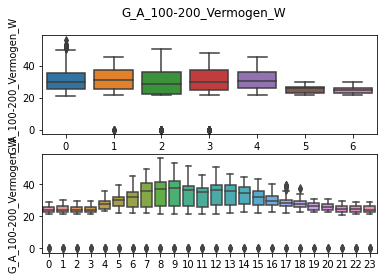

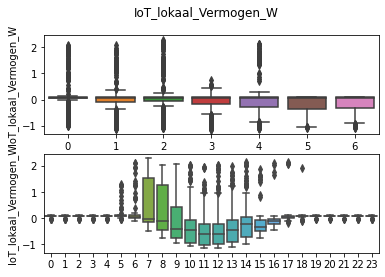

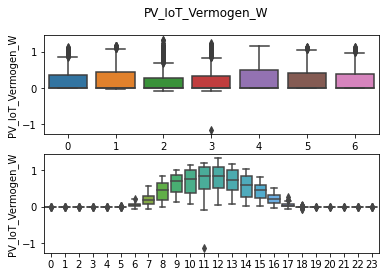

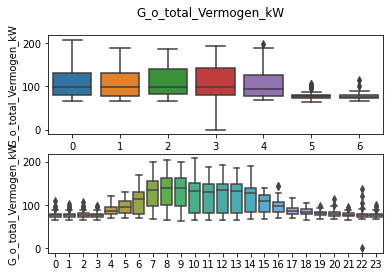

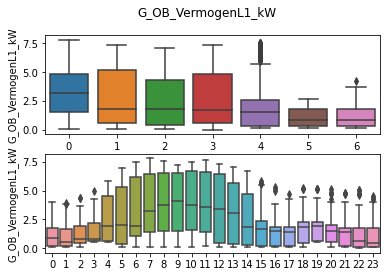

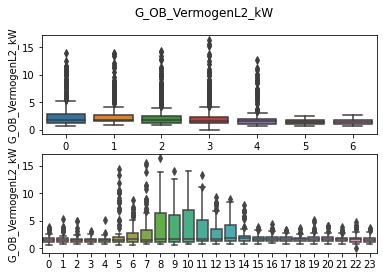

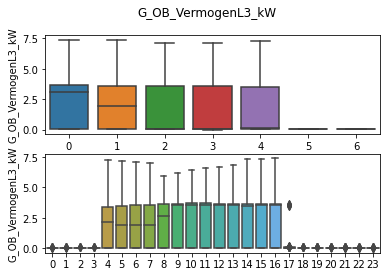

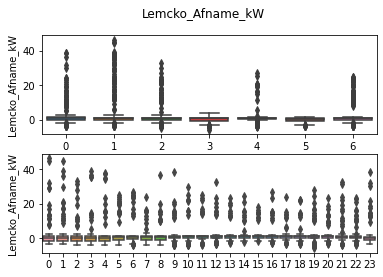

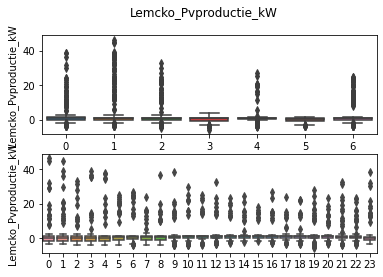

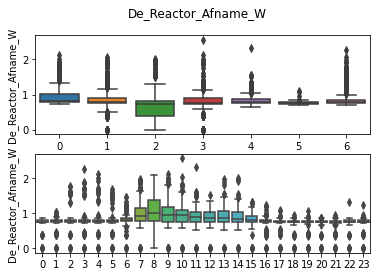

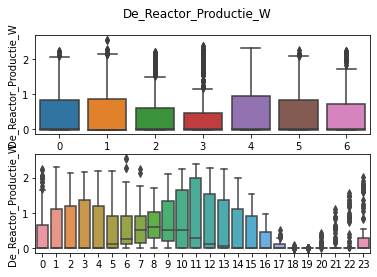

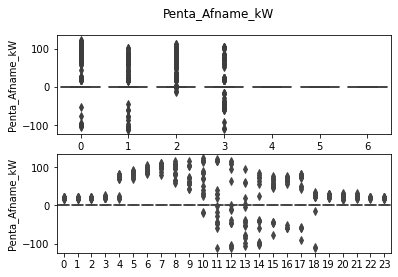

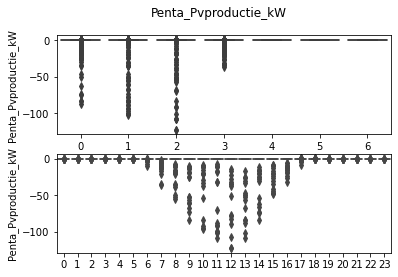

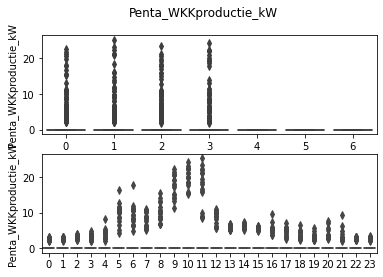

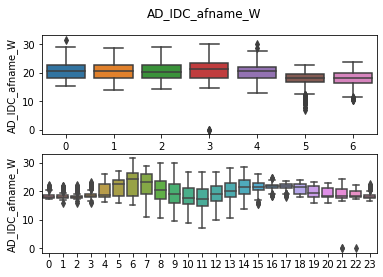

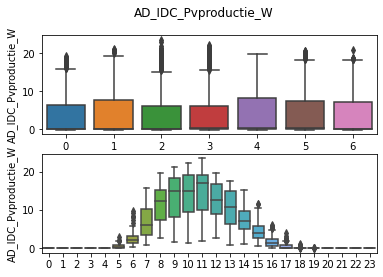

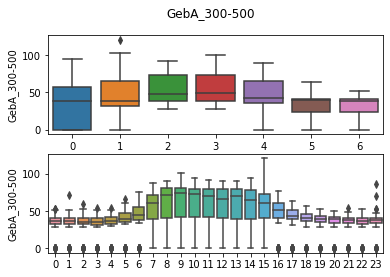

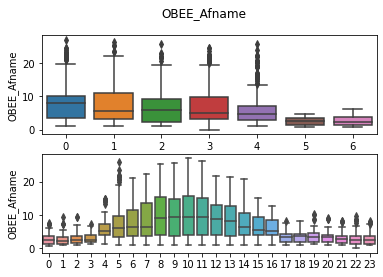

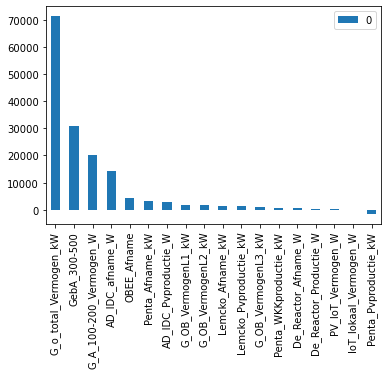

In [6]:
ene_geb=[]

for i in range(datakW.columns.size):
    ene_geb.append(round(maandver(datakW,datakW.columns[i]),1))
    print('Maandelijksverbruik van '+datakW.columns[i]+' is '+str(round(maandver(datakW,datakW.columns[i]),1))+' kWh voor september')
    plt.figure(i+1)
    fig, axs = plt.subplots(2)
    fig.suptitle(datakW.columns[i])
    sns.boxplot(data=datakW,x=datakW.index.weekday,y=datakW.columns[i],ax=axs[0])
    sns.boxplot(data=datakW,x=datakW.index.hour,y=datakW.columns[i],ax=axs[1])
    
ene_geb=np.array(ene_geb)
ene_geb=pd.DataFrame(ene_geb,index=datakW.columns)

ene_geb=ene_geb.sort_values(ene_geb.columns[0],ascending=0)
ene_geb.plot.bar()

Mismatch profiel is gelijk een GRID voor elke van de meters